In [1]:
from collections import Counter

In [2]:
import music21 as m21

from music21 import *


In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pylab as plt
from scipy.stats import entropy

In [5]:
import requests
import xml

In [6]:
piece = m21.converter.parse("./guren.mxl")
vocal = piece.parts[0]
for i in vocal.flat.notes:
    print(i)
    # if i.tie.type == "start":
        


<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note D#>
<music21.note.Note D#>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note D#>
<music21.note.Note D#>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note A#>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note G#>
<music21.note.Note A#>
<music21.note.Note A#>
<music21.note.Note F#>
<music21.note.Note D#>
<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note A#>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note A#>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note D#>
<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note A#>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note G#>
<music21.note.Note A#>
<m

In [12]:
features.jSymbolic?

In [9]:
a = graph.plot.HistogramPitchSpace(vocal,xHideUnused = False)

In [10]:
b = []
for i in vocal.flat.notes:
    print(i.pitch.ps)
    b.append(i.pitch.ps)

61.0
61.0
64.0
63.0
63.0
59.0
59.0
61.0
61.0
61.0
64.0
63.0
63.0
59.0
59.0
61.0
61.0
58.0
59.0
59.0
56.0
58.0
58.0
54.0
63.0
59.0
61.0
61.0
58.0
59.0
59.0
58.0
56.0
56.0
54.0
63.0
59.0
61.0
61.0
58.0
59.0
59.0
56.0
58.0
58.0
54.0
63.0
59.0
61.0
61.0
58.0
59.0
59.0
58.0
56.0
56.0
54.0
63.0
59.0
61.0
61.0
58.0
59.0
59.0
56.0
58.0
58.0
54.0
63.0
59.0
61.0
61.0
58.0
59.0
59.0
58.0
56.0
56.0
54.0
63.0
59.0
61.0
61.0
58.0
59.0
59.0
56.0
58.0
58.0
54.0
63.0
59.0
61.0
61.0
58.0
59.0
59.0
58.0
56.0
56.0
55.0
56.0
56.0
56.0
56.0
58.0
59.0
58.0
56.0
55.0
51.0
55.0
56.0
51.0
56.0
58.0
54.0
58.0
59.0
54.0
59.0
60.0
61.0
61.0
61.0
61.0
61.0
56.0
61.0
59.0
59.0
59.0
54.0
54.0
59.0
61.0
61.0
61.0
61.0
61.0
56.0
61.0
61.0
61.0
60.0
60.0
61.0
61.0
64.0
63.0
63.0
59.0
61.0
61.0
61.0
64.0
63.0
63.0
59.0
61.0
61.0
64.0
63.0
63.0
61.0
61.0
61.0
59.0
56.0
56.0
59.0
61.0
61.0
64.0
63.0
63.0
59.0
61.0
61.0
61.0
64.0
63.0
63.0
59.0
61.0
61.0
64.0
63.0
63.0
64.0
66.0
59.0
59.0
68.0
66.0
61.0
61.0
64.0
63.0
63.0


In [26]:
count = Counter(b)
print(count)
print(sum(count.values()))
n = sum(count.values())
info = {}
prob={}

for key,value in zip(count.keys(),count.values()):
    print(key)
    print(value)
    prob[key] = value/n
    info[key] = prob[key] * np.log(prob[key])

pe = -1 * sum(info.values())

def caluculate_entropy(dictionary):
    count = Counter(dictionary)
    n = sum(count.values())
    info = {}
    prob={}
    
    for key,value in zip(count.keys(),count.values()):
        print("note:{},How many:{}".format(key,value))
        prob[key] = value/n
        info[key] = prob[key] * np.log(prob[key])
        print("情報量:-{}*{}".format(prob[key],info[key]))
    
    entropy = -1 * sum(info.values())
    return entropy


    


    

Counter({61.0: 71, 59.0: 50, 63.0: 35, 56.0: 25, 58.0: 24, 64.0: 15, 54.0: 11, 55.0: 3, 60.0: 3, 51.0: 2, 66.0: 2, 68.0: 1})
242
61.0
71
64.0
15
63.0
35
59.0
50
58.0
24
56.0
25
54.0
11
55.0
3
51.0
2
60.0
3
66.0
2
68.0
1
1.9525920455158206


In [21]:
"""
音価・音高のペアのオブジェクトを楽譜から作る
タイの部分→連結

"""



record = []
checker = False
#タイがついた場合の途中記録用
pitch_tmp = 0.0
duration_tmp = 0.0
for i in vocal.flat.notesAndRests.stream():
    
    #タイがついている
    if i.tie:
        #タイのはじめの音ならまず音高を記録する
        if checker == False:
            if i.isNote == True:
                #record.append([i.pitch.ps,i.duration.quarterLength])
                pitch_tmp = i.pitch.ps
                duration_tmp += i.duration.quarterLength
            elif i.isRest == True:
                #record.append(["rest",i.duration.quarterLength])
                pitch_tmp = np.inf
                duration_tmp += i.duration.quarterLength
                
        #タイの途中の音なら音長を足していく      
        else:
            duration_tmp += i.duration.quarterLength
            
        #タイはついている   
        checker = True
        
    #タイがついてない    
    else:
        checker = False
        #直前がタイの最後の音ならタイでつながって一音になった音を追加
        if not duration_tmp == 0.0:
            record.append([pitch_tmp,duration_tmp])
            duration_tmp = 0.0
            
        #そうでなければ普通に追加
        if i.isNote == True:
            record.append([i.pitch.ps,i.duration.quarterLength])
        elif i.isRest == True:
            record.append([np.inf,i.duration.quarterLength])

print(record)
print(len(record))

[[61.0, 0.5], [61.0, 0.5], [64.0, 0.5], [63.0, 1.0], [59.0, 0.5], [59.0, 0.5], [61.0, 1.0], [61.0, 0.5], [64.0, 0.5], [63.0, 1.0], [59.0, 1.5], [inf, 4.0], [inf, 4.0], [inf, 4.0], [inf, 4.0], [inf, 4.0], [inf, 4.0], [inf, 4.0], [inf, 4.0], [inf, 4.0], [inf, 1.0], [59.0, 0.5], [61.0, 1.0], [58.0, 1.0], [59.0, 1.0], [56.0, 1.0], [58.0, 1.0], [54.0, 1.0], [inf, 0.5], [63.0, 1.0], [59.0, 0.5], [61.0, 1.0], [58.0, 1.0], [59.0, 1.0], [58.0, 1.0], [56.0, 1.0], [54.0, 1.0], [inf, 0.5], [63.0, 1.0], [59.0, 0.5], [61.0, 1.0], [58.0, 1.0], [59.0, 1.0], [56.0, 1.0], [58.0, 1.0], [54.0, 1.0], [inf, 0.5], [63.0, 1.0], [59.0, 0.5], [61.0, 1.0], [58.0, 1.0], [59.0, 1.0], [58.0, 1.0], [56.0, 1.0], [54.0, 1.0], [inf, 0.5], [63.0, 1.0], [59.0, 0.5], [61.0, 1.0], [58.0, 1.0], [59.0, 1.0], [56.0, 1.0], [58.0, 1.0], [54.0, 1.0], [inf, 0.5], [63.0, 1.0], [59.0, 0.5], [61.0, 1.0], [58.0, 1.0], [59.0, 1.0], [58.0, 1.0], [56.0, 1.0], [54.0, 1.0], [inf, 0.5], [63.0, 1.0], [59.0, 0.5], [61.0, 1.0], [58.0, 1.0], [

In [22]:
pitch_diff = []
for i in range(len(record)-1):
    pitch_diff.append(record[i+1][0] - record[i][0])
print(pitch_diff)

[0.0, 3.0, -1.0, -4.0, 0.0, 2.0, 0.0, 3.0, -1.0, -4.0, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, -inf, 2.0, -3.0, 1.0, -3.0, 2.0, -4.0, inf, -inf, -4.0, 2.0, -3.0, 1.0, -1.0, -2.0, -2.0, inf, -inf, -4.0, 2.0, -3.0, 1.0, -3.0, 2.0, -4.0, inf, -inf, -4.0, 2.0, -3.0, 1.0, -1.0, -2.0, -2.0, inf, -inf, -4.0, 2.0, -3.0, 1.0, -3.0, 2.0, -4.0, inf, -inf, -4.0, 2.0, -3.0, 1.0, -1.0, -2.0, -2.0, inf, -inf, -4.0, 2.0, -3.0, 1.0, -3.0, 2.0, -4.0, inf, -inf, -4.0, 2.0, -3.0, 1.0, -1.0, -2.0, -1.0, inf, -inf, 0.0, 0.0, 0.0, 2.0, 1.0, -1.0, -2.0, -1.0, inf, -inf, 4.0, 1.0, -5.0, 5.0, 2.0, -4.0, 4.0, 1.0, -5.0, 5.0, 1.0, inf, -inf, 0.0, 0.0, 0.0, -5.0, 5.0, -2.0, 0.0, 0.0, -5.0, 5.0, 2.0, 0.0, 0.0, 0.0, -5.0, 5.0, 0.0, 0.0, -1.0, 0.0, 1.0, 0.0, 3.0, -1.0, -4.0, 2.0, 0.0, 3.0, -1.0, -4.0, inf, -inf, 0.0, 3.0, -1.0, -2.0, 0.0, -2.0, -3.0, 3.0, inf, -inf, 0.0, 3.0, -1.0, -4.0, 2.0, 0.0, 3.0, -1.0, -4.0, inf, -inf, 0.0, 3.0, -1.0, 1.0, 2.0, -7.0, 9.0, -2.0, -5.0, 0.0, 3.0, -1.0, -4.0, 2.0, 0.0, 3.

In [23]:
def shuukei(vocalpart):
    """
    音価・音高のペアのオブジェクトを楽譜から作る
    タイの部分→連結

    """
    record = []
    checker = False
    #タイがついた場合の途中記録用
    pitch_tmp = 0.0
    duration_tmp = 0.0
    for i in vocalpart.flat.notesAndRests.stream():
        
        #タイがついている
        if i.tie:
            #タイのはじめの音ならまず音高を記録する
            if checker == False:
                if i.isNote == True:
                    #record.append([i.pitch.ps,i.duration.quarterLength])
                    #音符はノート番号
                    pitch_tmp = i.pitch.ps
                    duration_tmp += i.duration.quarterLength
                elif i.isRest == True:
                    #record.append(["rest",i.duration.quarterLength])
                    #休符は無限にする
                    pitch_tmp = np.inf
                    duration_tmp += i.duration.quarterLength
                
            #タイの途中の音なら音長を足していく      
            else:
                duration_tmp += i.duration.quarterLength
            
            #タイはついている   
            checker = True
        
        #タイがついてない    
        else:
            checker = False
            #直前がタイの最後の音ならタイでつながって一音になった音を追加
            if not duration_tmp == 0.0:
                record.append([pitch_tmp,duration_tmp])
                duration_tmp = 0.0
            
            #そうでなければ普通に追加
            if i.isNote == True:
                record.append([i.pitch.ps,i.duration.quarterLength])
            elif i.isRest == True:
                record.append([np.inf,i.duration.quarterLength])

    return record

In [24]:
def count_pitch(song):
    #[音高,音価]が要素になったリストから音高を集計する
    lis = []
    for n in range(len(song)):
        lis.append(song[n][0])
    pitch_count = Counter(lis)
    return pitch_count


In [25]:
def count_duration(song):
    #[音高,音価]が要素になったリストから音高を集計する
    lis = []
    for n in range(len(song)):
        lis.append(song[n][1])
    duration_count = Counter(lis)
    return duration_count


In [26]:
def make_pitch_bigram(shuukei_obj):
    #[音高,音価]が要素になったリストから音高のBigramのリストを作成する
    pitch_diff = []
    for i in range(len(shuukei_obj)-1):
        pitch_diff.append(int(shuukei_obj[i+1][0] - int(shuukei_obj[i][0])
    return pitch_diff

SyntaxError: invalid syntax (<ipython-input-26-c9af06f7829a>, line 6)

In [27]:
def make_duration_bigram(shuukei_obj):
    #[音高,音価]が要素になったリストから音高のBigramのリストを作成する
    duration_diff = []
    for i in range(len(shuukei_obj)-1):
        duration_diff.append(shuukei_obj[i+1][1] - shuukei_obj[i][1])
    return duration_diff

In [28]:
def jump_rate(bigram_status):
    #バイグラム列から跳躍の割合を返す
    up_jump = 0
    down_jump = 0
    slope = 0 
    for key in bigram_status.keys():
        if np.abs(key) <= 2:
            slope += bigram_status[key]
        elif np.abs(key) <= 10000:
            if key > 0:
            	up_jump += bigram_status[key]
            else:
                down_jump += bigram_status[key]
    all_of_notes = up_jump + down_jump + slope
    
    return set((up_jump+down_jump)/all_of_notes,up_jump/all_of_notes,down_jump/all_of_notes)          

In [29]:
def delete_inf(bigram_status): 
    #休符を含むBigramを削除
    del bigram_status[np.inf]
    del bigram_status[-np.inf]
    return bigram_status

### 以下関係ないテストコード群


In [30]:
a = [0.25, 2.0, 0.33, 0.5, 1.0,5.0]

print(list(map(dc,a)))

NameError: name 'dc' is not defined

In [31]:
from statistics import mode

la = [0, 0, 1, 1]
crs=Counter(la).most_common()
def mode_multiOK(counter_most_common):
    arr = []
    longest = crs[0][1]
    for i in crs:
        l = i[1]
        if l == longest:
            arr.append(i[0])
        else:
            break
    return arr
tt = mode_multiOK(crs)
print(mode_multiOK(crs))
        
print(2 in tt)

[0, 1]
False


In [32]:
def dc(length):
    difficulty = 0
    if length >= 2.0:
        difficulty = 2.0
    elif length == 1.0:
        difficulty = 4.0
    elif length == 0.5:
        difficulty = 6.0
    elif length == 0.25:
        difficulty = 8.0
    else:
        difficulty = 9.0
    return difficulty


In [33]:
#藤井論文音価難易度
def mode_multiOK(counter_most_common):
    arr = []
    longest = crs[0][1]
    for i in crs:
        l = i[1]
        if l == longest:
            arr.append(i[0])
        else:
            break
    return arr

def dc(length):
    difficulty = 0
    if length >= 2.0:
        difficulty = 2.0
    elif length == 1.0:
        difficulty = 4.0
    elif length == 0.5:
        difficulty = 6.0
    elif length == 0.25:
        difficulty = 8.0
    else:
        difficulty = 9.0
    return difficulty


def rhythm_difficulty(notes):
    l = 0
    #全ての音価を記録
    tmp = []
    #最頻の音価より短いもの
    longer = []
    #最頻の音価より長いもの
    shorter = []
    #
    a= 0.0
    s = 0.0
    d1 = 0.0
    
    #音価列のの記録
    for duration in notes[1]:
        tmp.append(duration)
    #最頻音価の記録
    l = mode_multiOK(tmp)
    dp = sum(list(map(dc,l)))/len(l)
    
    #最頻音価より長い/短いに着目して記録
    for duration in notes[1]:
        if duration in l:
            pass
        elif duration < min(l):
            shorter.append(duration)
        elif duration > max(l):
            longer.append(duration)
            
    n = len(shorter) + len(longer) 
    a_max = (10-dp)/n
    s_max = (dp-1)/n
    
    for snote in shorter:
        a += ((dc(snote)-dp)/dp) * a_max
    for lnote in longer:
        s += ((dp- dc(lnote))/dp) * s_max
    
    d1 = dp+a-s
    
    return d1


In [34]:
p1 = stream.Part()
k1 = key.KeySignature(0) # key of C
n1 = note.Note('B')
r1 = note.Rest()
c1 = chord.Chord(['A', 'B-'])
p1.append([k1, n1, r1, c1])
p1.show('text')

{0.0} <music21.key.KeySignature of no sharps or flats>
{0.0} <music21.note.Note B>
{1.0} <music21.note.Rest rest>
{2.0} <music21.chord.Chord A B->


In [35]:
noteStream = p1.notes.stream()
noteStream?
noteStream.show('text')

{0.0} <music21.note.Note B>
{2.0} <music21.chord.Chord A B->


In [22]:
piece1 = m21.converter.parse("./cherry.xml")
vocal1 = piece1.parts[0]

In [23]:
for a in vocal1.flat.notes.stream():
    

SyntaxError: invalid syntax (<ipython-input-23-5f8685957938>, line 1)

In [40]:
class all_of_features:
	def __init__ (self):
        self.number = 0
    	self.music_pieces = []
		self.volcal_parts = []
		self.note_statics = []
		self.pitch_bigrams = []
		self.pitch_bigram_status = []
		self.duration_bigrams = []
		self.duration_bigram_status = []
        
    def vocal_part_to_features(vocal,head,tail):
        #ボーカルパートの楽譜と分析区間（小節番号）を入力すると特徴をリストに追加する
    	analysee = shuukei(vocal.measures(head,tail))
    	#[音高、音価]をリストに追加
    	note_statics.append(analysee)
    	#音高バイグラムをリストに追加
    	analysee_pitch_bigram = make_pitch_bigram(analysee)
    	pitch_bigrams.append(analysee_pitch_bigram)
    	#音価バイグラムをリストに追加
    	analysee_duration_bigram = make_duration_bigram(analysee)
    	duration_bigrams.append(analysee_duration_bigram)
    	pitch_bigram_status.append(delete_inf(Counter(analysee_pitch_bigram)))
    	duration_bigram_status.append(Counter(analysee_duration_bigram))
        

TabError: inconsistent use of tabs and spaces in indentation (<ipython-input-40-d9dc405434c3>, line 3)

In [39]:
def vocal_part_to_features(vocal,head,tail):
    #ボーカルパートの楽譜と分析区間（小節番号）を入力すると特徴をリストに追加する
    analysee = shuukei(vocal.measures(head,tail))
    #[音高、音価]をリストに追加
    note_statics.append(analysee)
    #音高バイグラムをリストに追加
    analysee_pitch_bigram = make_pitch_bigram(analysee)
    pitch_bigrams.append(analysee_pitch_bigram)
    #音価バイグラムをリストに追加
    analysee_duration_bigram = make_duration_bigram(analysee)
    duration_bigrams.append(analysee_duration_bigram)
    pitch_bigram_status.append(delete_inf(Counter(analysee_pitch_bigram)))
    duration_bigram_status.append(Counter(analysee_duration_bigram))

In [38]:
piece1 = m21.converter.parse("./cherry.xml")
vocal1 = piece1.parts[0]
piece2 = m21.converter.parse("./TSUNAMI.xml")
vocal2 = piece2.parts[0]
piece3 = m21.converter.parse("./roman.xml")
vocal3 = piece3.parts[0]
piece4 = m21.converter.parse("./aporo3.xml")
vocal4 = piece4.parts[0]
music_pieces.append(piece1)
volcal_parts.append(vocal1)
music_pieces.append(piece2)
volcal_parts.append(vocal2)
music_pieces.append(piece3)
volcal_parts.append(vocal3)
music_pieces.append(piece4)
volcal_parts.append(vocal4)
music_pieces.append(piece5)
volcal_parts.append(vocal5)
music_pieces.append(piece6)
volcal_parts.append(vocal6)

NameError: name 'music_pieces' is not defined

In [36]:
piece5 = m21.converter.parse("./guren.mxl")
vocal5 = piece5.parts[0]
piece6 = m21.converter.parse("./konayuki.mxl")
vocal6 = piece6.parts[0]

In [37]:
vocal1 = vocal1.measures(1,25)
vocal2 = vocal2.measures(1,49)
vocal3= vocal3.measures(1,29)
vocal4 = vocal4.measures(3,59)
vocal5 = vocal5.measures(12,51)
vocal6 = vocal6.measures(5,45)


NameError: name 'vocal1' is not defined

In [62]:
cherry = shuukei(vocal1)
tsunami = shuukei(vocal2)
roman = shuukei(vocal3)
aporo= shuukei(vocal4)

In [63]:
guren = shuukei(vocal5)

konayuki = shuukei(vocal6)

In [65]:
cherry


[[inf, 0.5],
 [60.0, 0.5],
 [60.0, 0.5],
 [60.0, 0.25],
 [60.0, 0.75],
 [62.0, 0.5],
 [64.0, 0.5],
 [65.0, 0.5],
 [62.0, 2.0],
 [inf, 1.0],
 [55.0, 0.5],
 [55.0, 0.5],
 [57.0, 0.5],
 [57.0, 0.5],
 [57.0, 0.5],
 [52.0, 0.25],
 [57.0, 0.75],
 [59.0, 0.5],
 [60.0, 0.5],
 [62.0, 0.5],
 [64.0, 2.0],
 [inf, 1.0],
 [64.0, 0.5],
 [64.0, 0.5],
 [65.0, 0.5],
 [65.0, 0.5],
 [65.0, 0.5],
 [65.0, 0.25],
 [65.0, 0.75],
 [64.0, 0.5],
 [62.0, 0.5],
 [60.0, 0.5],
 [64.0, 2.0],
 [inf, 1.0],
 [64.0, 0.5],
 [67.0, 0.5],
 [65.0, 0.5],
 [65.0, 0.5],
 [65.0, 0.5],
 [65.0, 0.25],
 [65.0, 0.75],
 [64.0, 0.5],
 [62.0, 0.5],
 [60.0, 0.5],
 [62.0, 2.0],
 [inf, 2.0],
 [inf, 0.5],
 [60.0, 0.5],
 [60.0, 0.5],
 [60.0, 0.25],
 [60.0, 0.75],
 [62.0, 0.5],
 [64.0, 0.5],
 [65.0, 0.5],
 [62.0, 2.0],
 [inf, 1.0],
 [55.0, 0.5],
 [55.0, 0.5],
 [57.0, 0.5],
 [57.0, 0.5],
 [57.0, 0.5],
 [52.0, 0.25],
 [57.0, 0.75],
 [59.0, 0.5],
 [60.0, 0.5],
 [62.0, 0.5],
 [64.0, 2.0],
 [inf, 1.0],
 [64.0, 0.5],
 [64.0, 0.5],
 [inf, 0.5],
 [6

In [34]:
vocal_part_to_feature(v)
    

NameError: name 'vocal_part_to_feature' is not defined

In [56]:
print(len(cherry))
print(len(tsunami))
print(len(roman))
print(len(aporo))
print(len(guren))
print(len(konayuki))

138
250
145
228
194
238


In [368]:
tsunami_pitch_bigram = make_pitch_bigram(tsunami)

In [421]:
guren_pitch_bigram = make_pitch_bigram(guren)
konayuki_pitch_bigram = make_pitch_bigram(konayuki)

In [422]:
guren_pitch_bigram

[-inf,
 2.0,
 -3.0,
 1.0,
 -3.0,
 2.0,
 -4.0,
 inf,
 -inf,
 -4.0,
 2.0,
 -3.0,
 1.0,
 -1.0,
 -2.0,
 -2.0,
 inf,
 -inf,
 -4.0,
 2.0,
 -3.0,
 1.0,
 -3.0,
 2.0,
 -4.0,
 inf,
 -inf,
 -4.0,
 2.0,
 -3.0,
 1.0,
 -1.0,
 -2.0,
 -2.0,
 inf,
 -inf,
 -4.0,
 2.0,
 -3.0,
 1.0,
 -3.0,
 2.0,
 -4.0,
 inf,
 -inf,
 -4.0,
 2.0,
 -3.0,
 1.0,
 -1.0,
 -2.0,
 -2.0,
 inf,
 -inf,
 -4.0,
 2.0,
 -3.0,
 1.0,
 -3.0,
 2.0,
 -4.0,
 inf,
 -inf,
 -4.0,
 2.0,
 -3.0,
 1.0,
 -1.0,
 -2.0,
 -1.0,
 inf,
 -inf,
 0.0,
 0.0,
 0.0,
 2.0,
 1.0,
 -1.0,
 -2.0,
 -1.0,
 inf,
 -inf,
 4.0,
 1.0,
 -5.0,
 5.0,
 2.0,
 -4.0,
 4.0,
 1.0,
 -5.0,
 5.0,
 1.0,
 inf,
 -inf,
 0.0,
 0.0,
 0.0,
 -5.0,
 5.0,
 -2.0,
 0.0,
 0.0,
 -5.0,
 5.0,
 2.0,
 0.0,
 0.0,
 0.0,
 -5.0,
 5.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 1.0,
 0.0,
 3.0,
 -1.0,
 -4.0,
 2.0,
 0.0,
 3.0,
 -1.0,
 -4.0,
 inf,
 -inf,
 0.0,
 3.0,
 -1.0,
 -2.0,
 0.0,
 -2.0,
 -3.0,
 3.0,
 inf,
 -inf,
 0.0,
 3.0,
 -1.0,
 -4.0,
 2.0,
 0.0,
 3.0,
 -1.0,
 -4.0,
 inf,
 -inf,
 0.0,
 3.0,
 -1.0,
 1.0,
 2.0,
 -7.0,
 9

In [328]:
tsunami_pitch_bigram_status = delete_inf(Counter(tsunami_pitch_bigram))

In [423]:
guren_pitch_bigram_status = delete_inf(Counter(guren_pitch_bigram))
konayuki_pitch_bigram_status = delete_inf(Counter(konayuki_pitch_bigram))

In [350]:
#バイグラム
tsunami_pitch_bigram_status

Counter({nan: 1,
         -7.0: 1,
         -5.0: 2,
         -4.0: 3,
         -3.0: 6,
         -2.0: 47,
         -1.0: 15,
         0.0: 32,
         1.0: 10,
         2.0: 36,
         3.0: 14,
         4.0: 9,
         5.0: 10,
         6.0: 1,
         7.0: 1,
         10.0: 1,
         12.0: 1})

In [424]:
#バイグラム
guren_pitch_bigram_status

Counter({-7.0: 1,
         -5.0: 6,
         -4.0: 20,
         -3.0: 14,
         -2.0: 16,
         -1.0: 20,
         0.0: 28,
         1.0: 14,
         2.0: 21,
         3.0: 14,
         4.0: 2,
         5.0: 5,
         9.0: 1})

In [330]:
tsunami_pitch_status = count_pitch(tsunami)
tsunami_pitch_status

Counter({45.0: 4,
         50.0: 12,
         52.0: 11,
         53.0: 2,
         54.0: 20,
         55.0: 17,
         56.0: 3,
         57.0: 35,
         58.0: 4,
         59.0: 29,
         60.0: 1,
         61.0: 9,
         62.0: 29,
         64.0: 24,
         66.0: 15,
         67.0: 2,
         69.0: 1,
         70.0: 1,
         inf: 31})

In [77]:
cherry_duration = count_duration(cherry)
tsunami_duration = count_duration(tsunami)
roman_duration = count_duration(roman)
aporo_duration = count_duration(aporo)
guren_duration = count_duration(guren)
konayuki_duration = count_duration(konayuki)

# グラフのバグが直せなかったのでこの形です
print(sorted(cherry_duration.items(), key=lambda x: x[0]))
print(sorted(tsunami_duration.items(), key=lambda x: x[0]))
print(sorted(roman_duration.items(), key=lambda x: x[0]))
print(sorted(aporo_duration.items(), key=lambda x: x[0]))
print(sorted(guren_duration.items(), key=lambda x: x[0]))
print(sorted(konayuki_duration.items(), key=lambda x: x[0]))


[(0.25, 14), (0.5, 79), (0.75, 12), (1.0, 20), (1.5, 4), (2.0, 9)]
[(0.25, 14), (0.5, 175), (0.75, 1), (1.0, 34), (1.25, 5), (1.5, 17), (2.0, 2), (2.5, 1), (4.0, 1)]
[(0.5, 105), (1.0, 24), (1.5, 8), (2.0, 3), (2.5, 2), (3.0, 1), (4.5, 2)]
[(0.5, 105), (1.0, 96), (1.5, 2), (2.0, 14), (4.0, 9), (5.5, 1), (7.0, 1)]
[(0.25, 4), (0.5, 78), (0.75, 4), (1.0, 101), (1.5, 5), (2.0, 2)]
[(0.25, 81), (0.5, 92), (0.75, 11), (1.0, 8), (1.25, 3), (1.5, 17), (1.75, 13), (2.0, 11), (3.5, 1), (4.0, 1)]


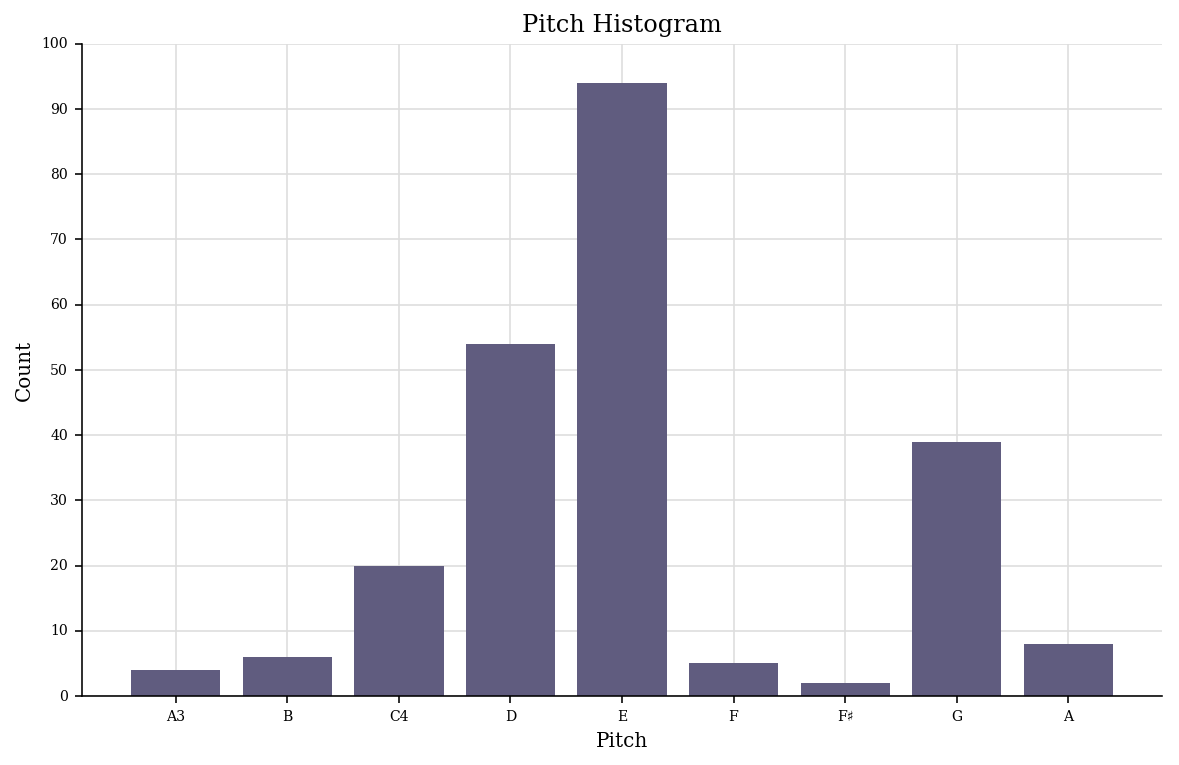

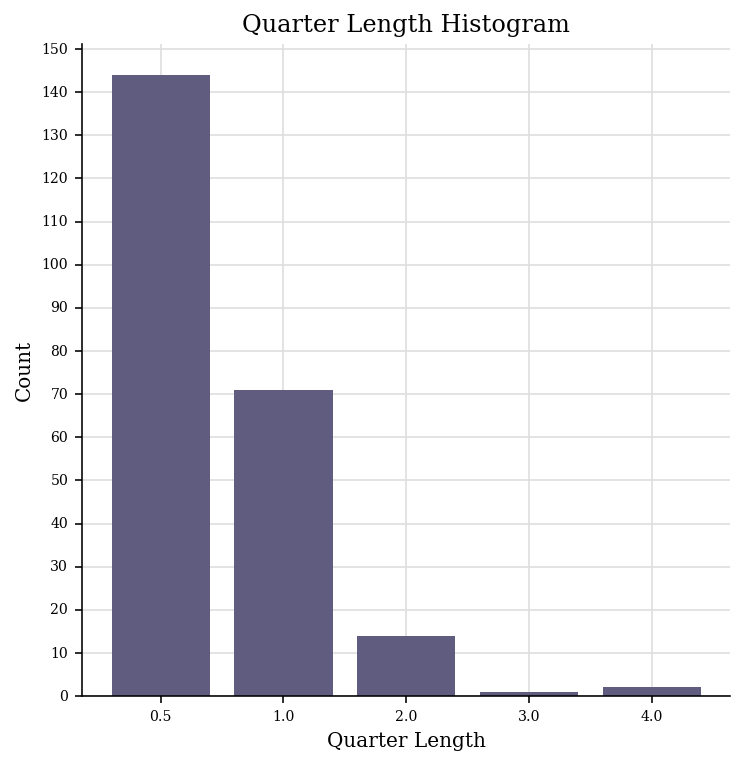

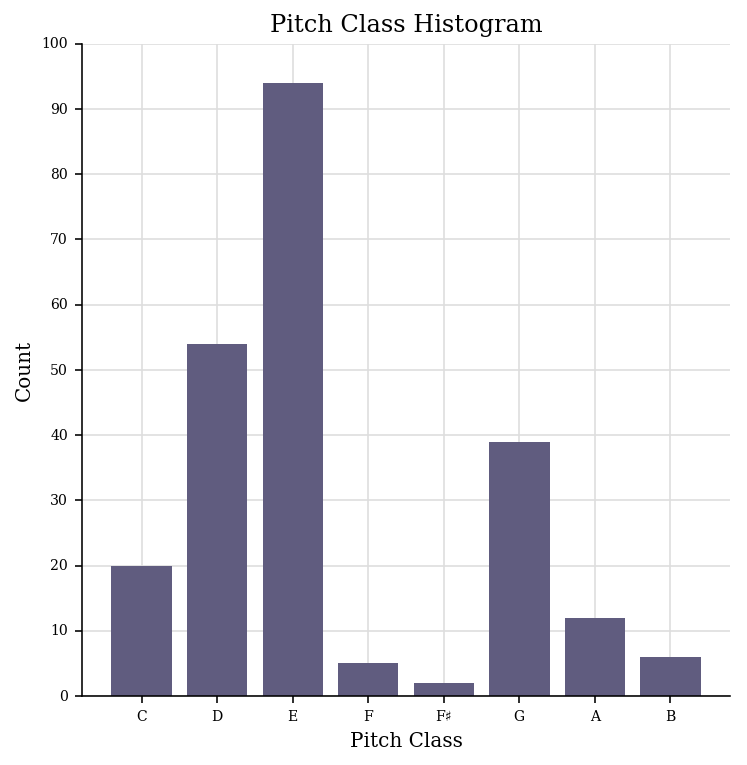

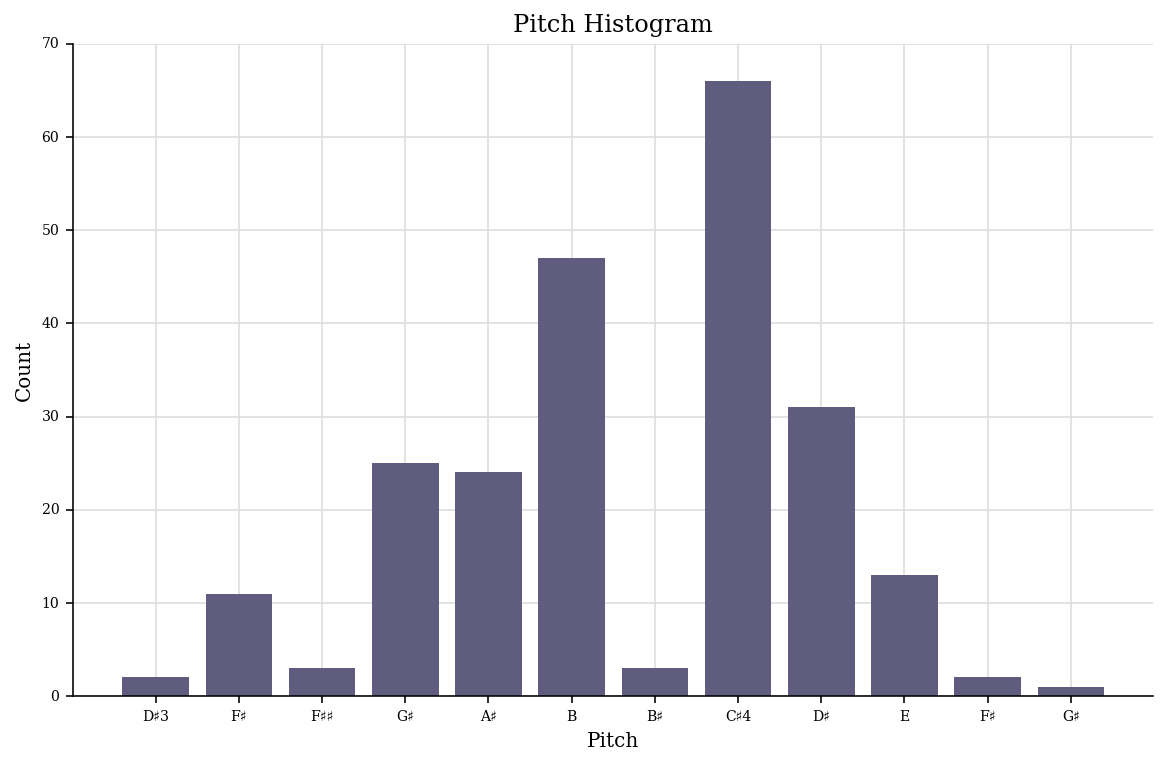

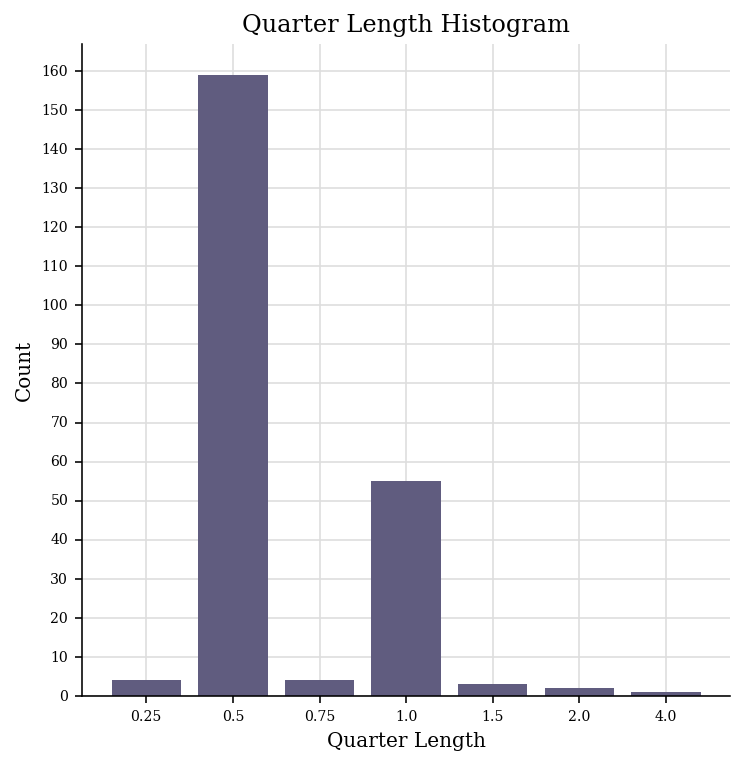

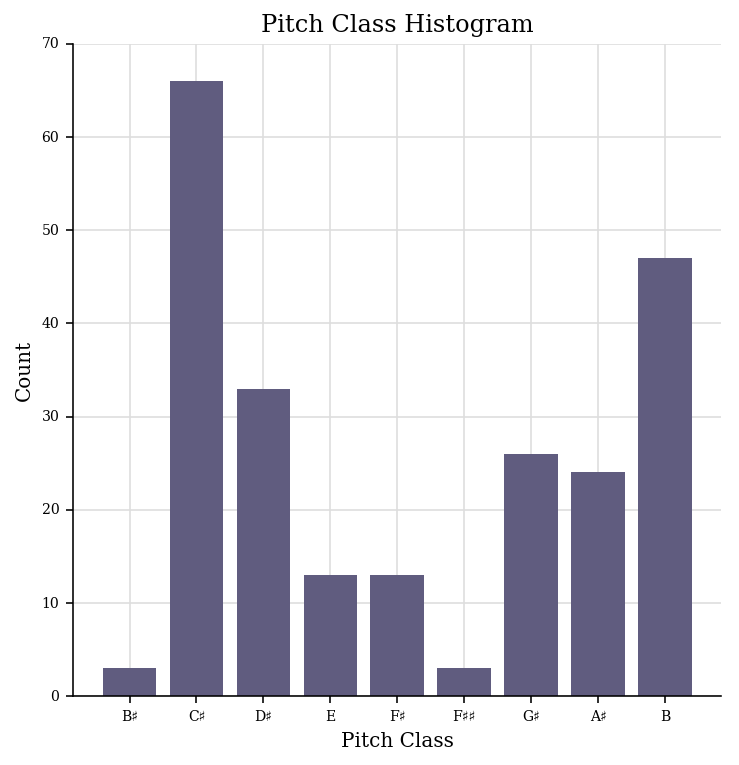

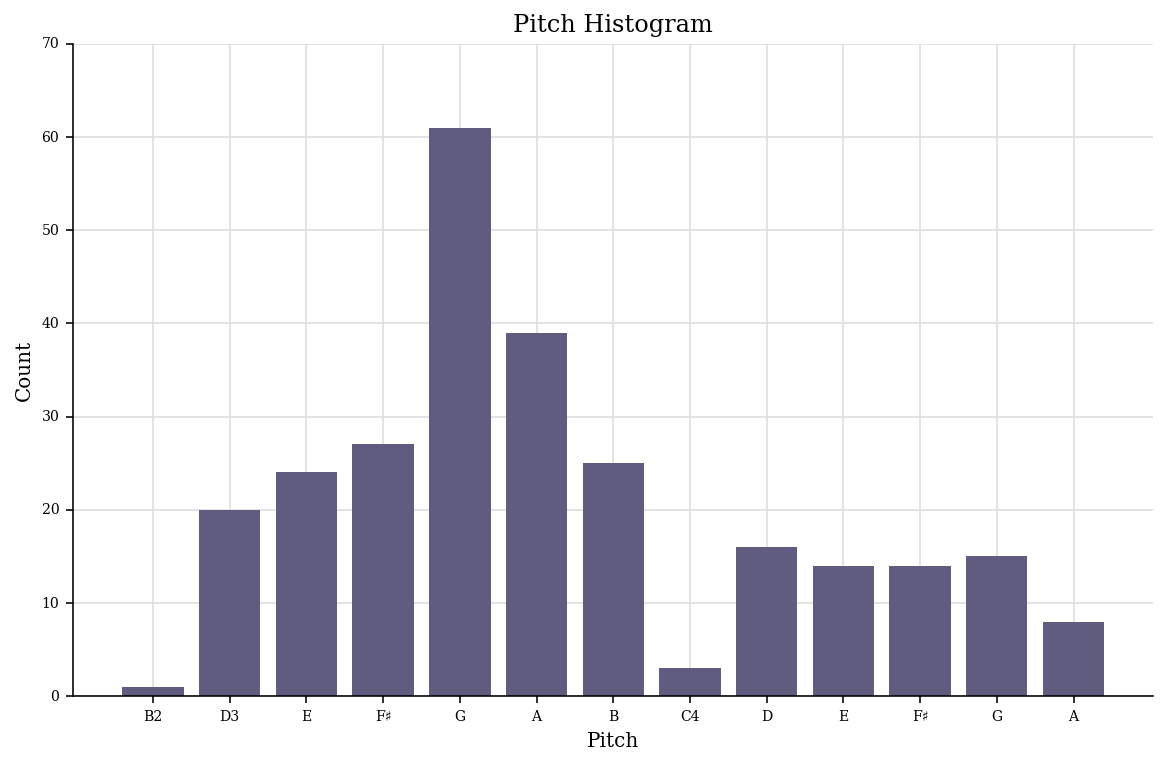

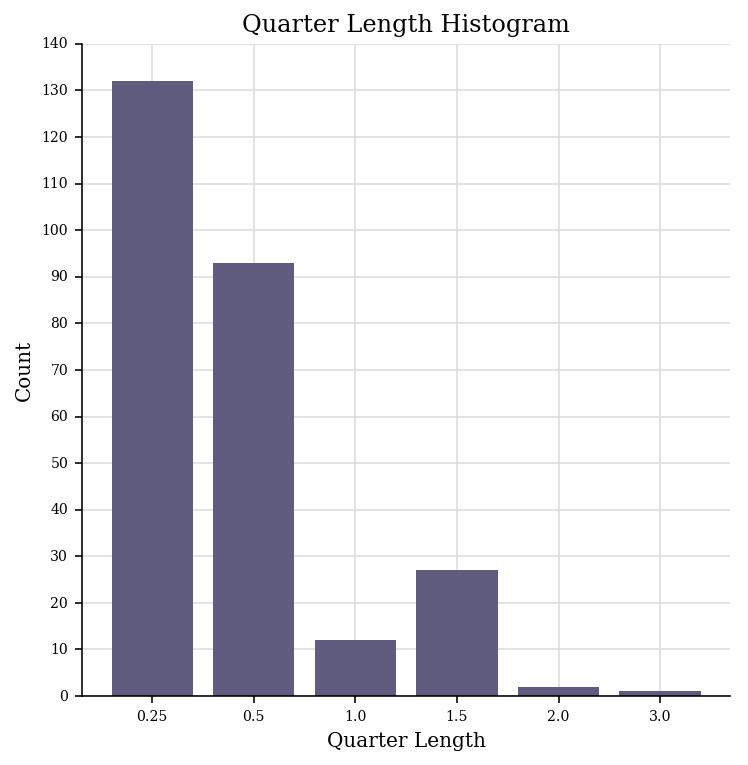

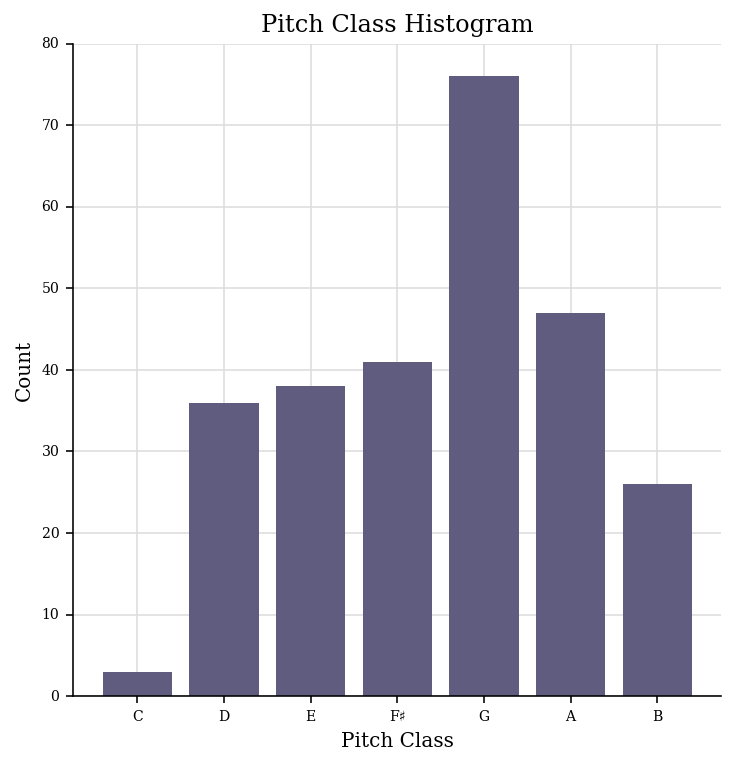

In [84]:
"""
vocal1.plot("histogram","pitch")
vocal1.plot("histogram","quarterLength")
vocal1.plot("histogram","pitchclass")

vocal2.plot("histogram","pitch")
vocal2.plot("histogram","quarterLength")
vocal2.plot("histogram","pitchclass")
vocal3.plot("histogram","pitch")
vocal3.plot("histogram","quarterLength")
vocal3.plot("histogram","pitchclass")


"""
vocal4.plot("histogram","pitch")
vocal4.plot("histogram","quarterLength")
vocal4.plot("histogram","pitchclass")
vocal5.plot("histogram","pitch")
vocal5.plot("histogram","quarterLength")
vocal5.plot("histogram","pitchclass")
vocal6.plot("histogram","pitch")
vocal6.plot("histogram","quarterLength")
vocal6.plot("histogram","pitchclass")



'\nvocal3.plot("histogram","pitch")\nvocal3.plot("histogram","quarterLength")\nvocal3.plot("histogram","pitchclass")\nvocal4.plot("histogram","pitch")\nvocal4.plot("histogram","quarterLength")\nvocal4.plot("histogram","pitchclass")\nvocal5.plot("histogram","pitch")\nvocal5.plot("histogram","quarterLength")\nvocal5.plot("histogram","pitchclass")\nvocal6.plot("histogram","pitch")\nvocal6.plot("histogram","quarterLength")\nvocal6.plot("histogram","pitchclass")\n'

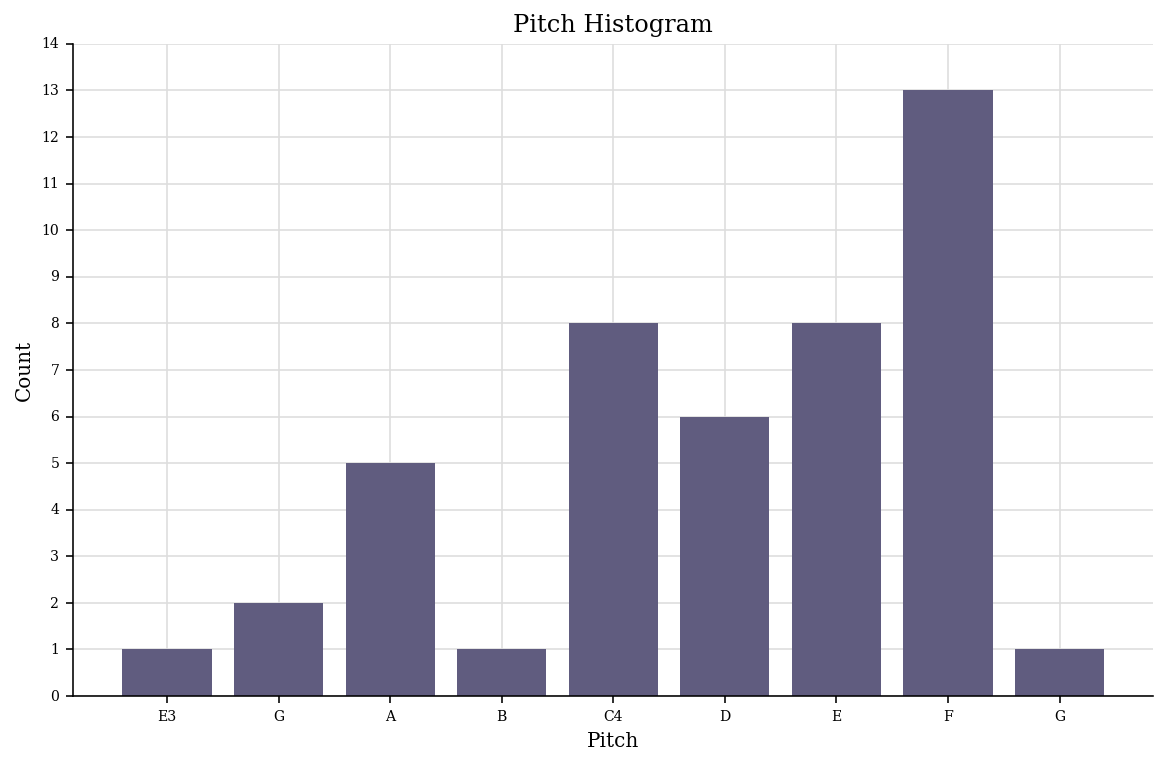

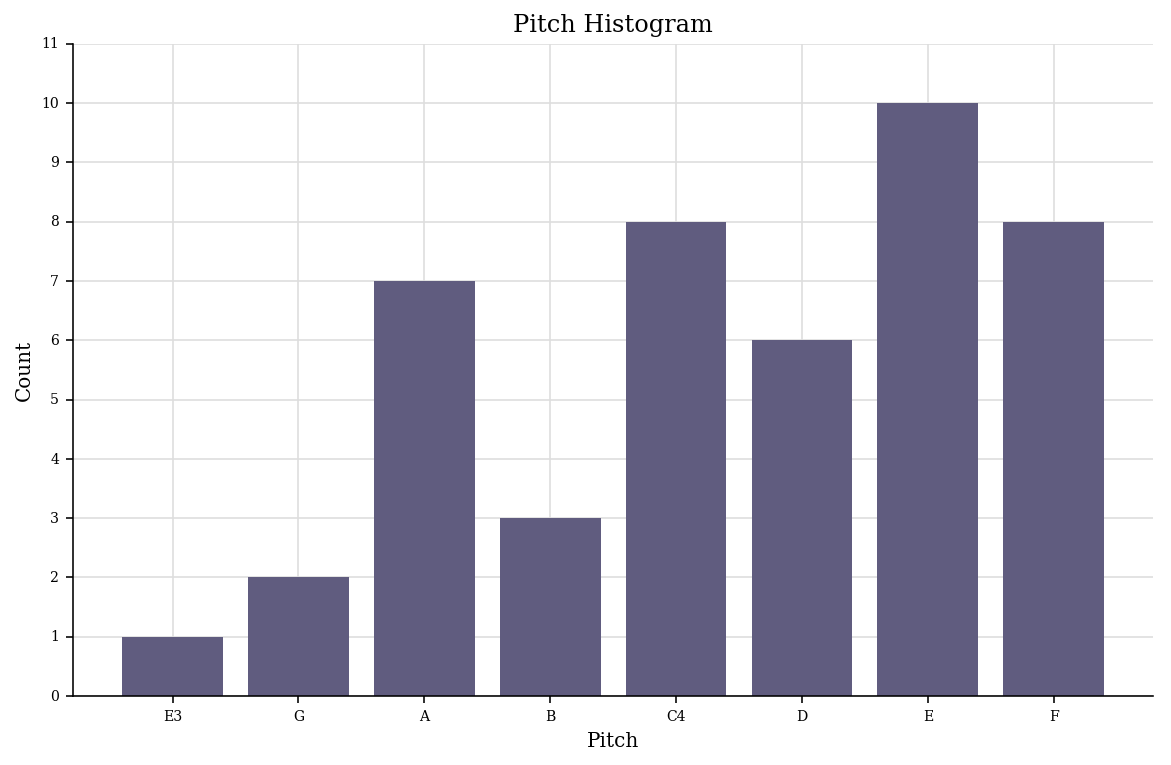

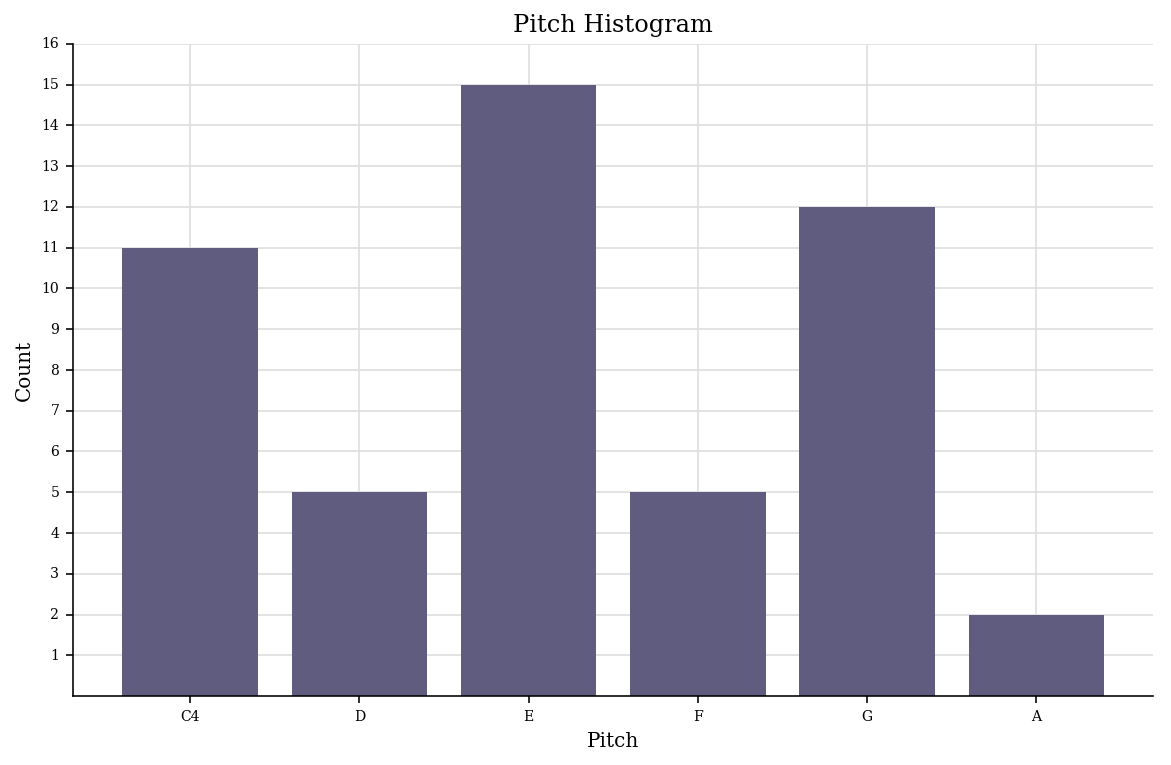

In [88]:
vocal1.measures(1,8).plot("histogram","pitch")
vocal1.measures(9,15).plot("histogram","pitch")
vocal1.measures(16,24).plot("histogram","pitch")

'\nvocal3.plot("histogram","pitch")\nvocal3.plot("histogram","quarterLength")\nvocal3.plot("histogram","pitchclass")\nvocal4.plot("histogram","pitch")\nvocal4.plot("histogram","quarterLength")\nvocal4.plot("histogram","pitchclass")\nvocal5.plot("histogram","pitch")\nvocal5.plot("histogram","quarterLength")\nvocal5.plot("histogram","pitchclass")\nvocal6.plot("histogram","pitch")\nvocal6.plot("histogram","quarterLength")\nvocal6.plot("histogram","pitchclass")\n'

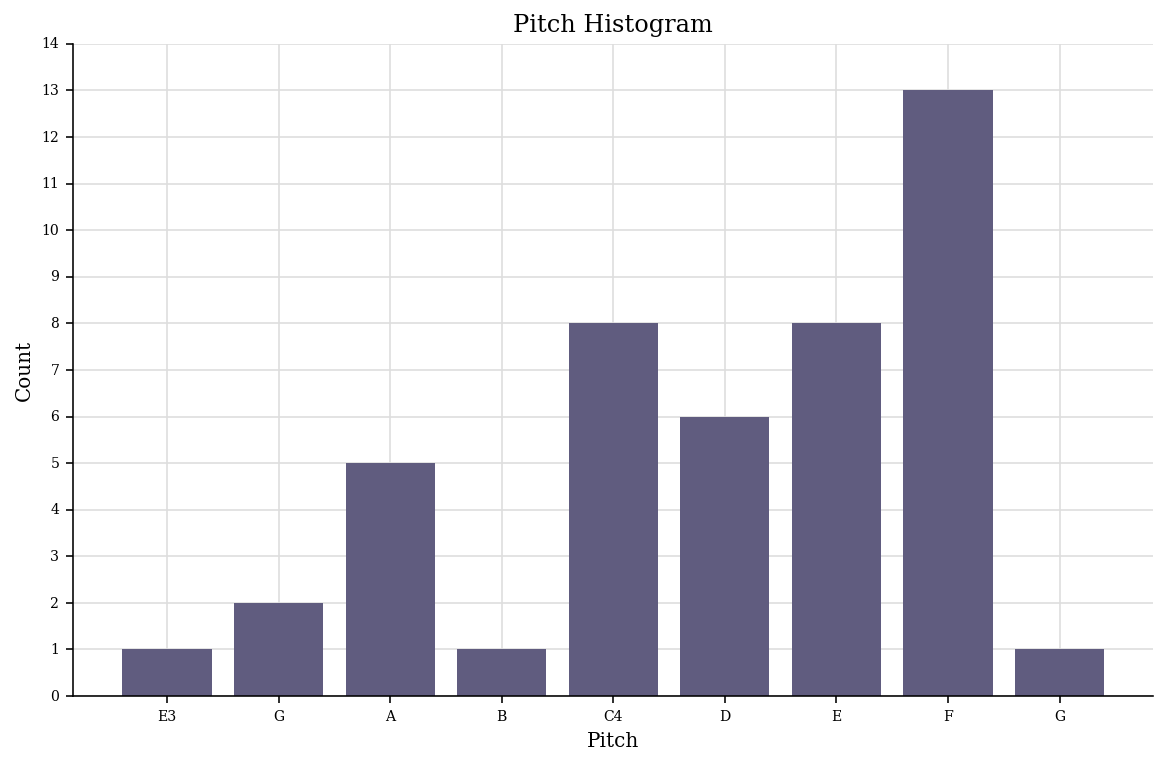

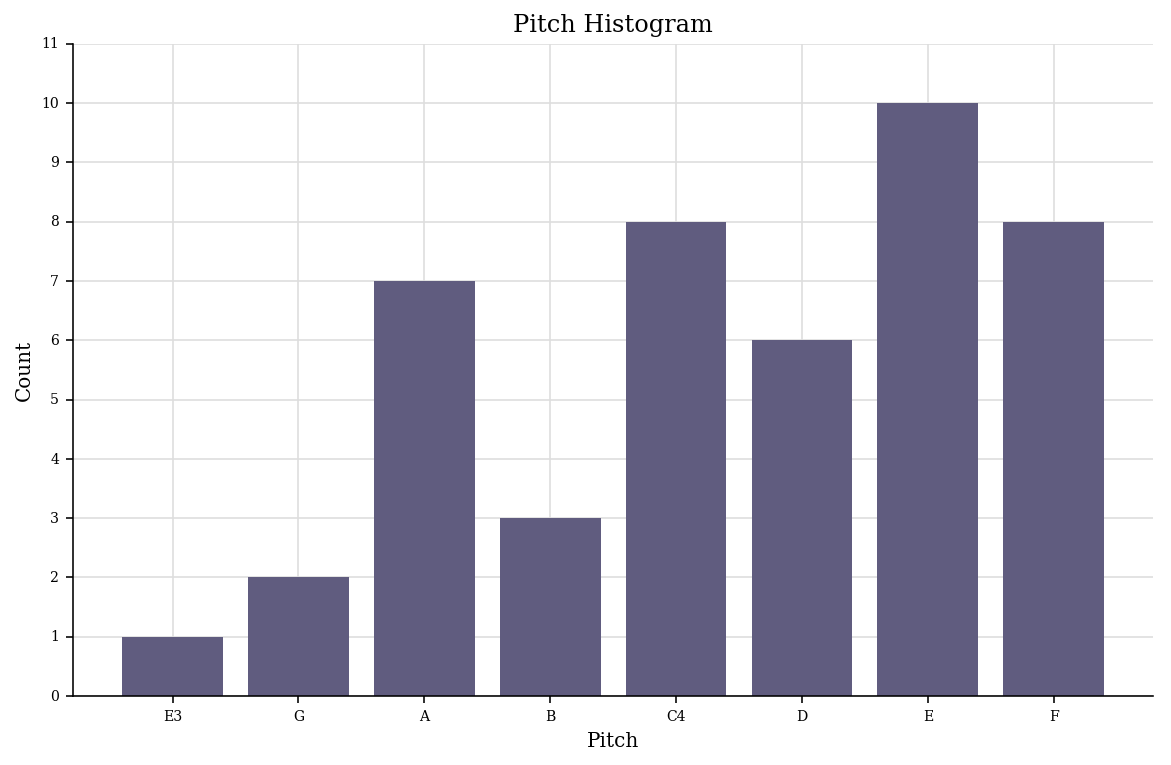

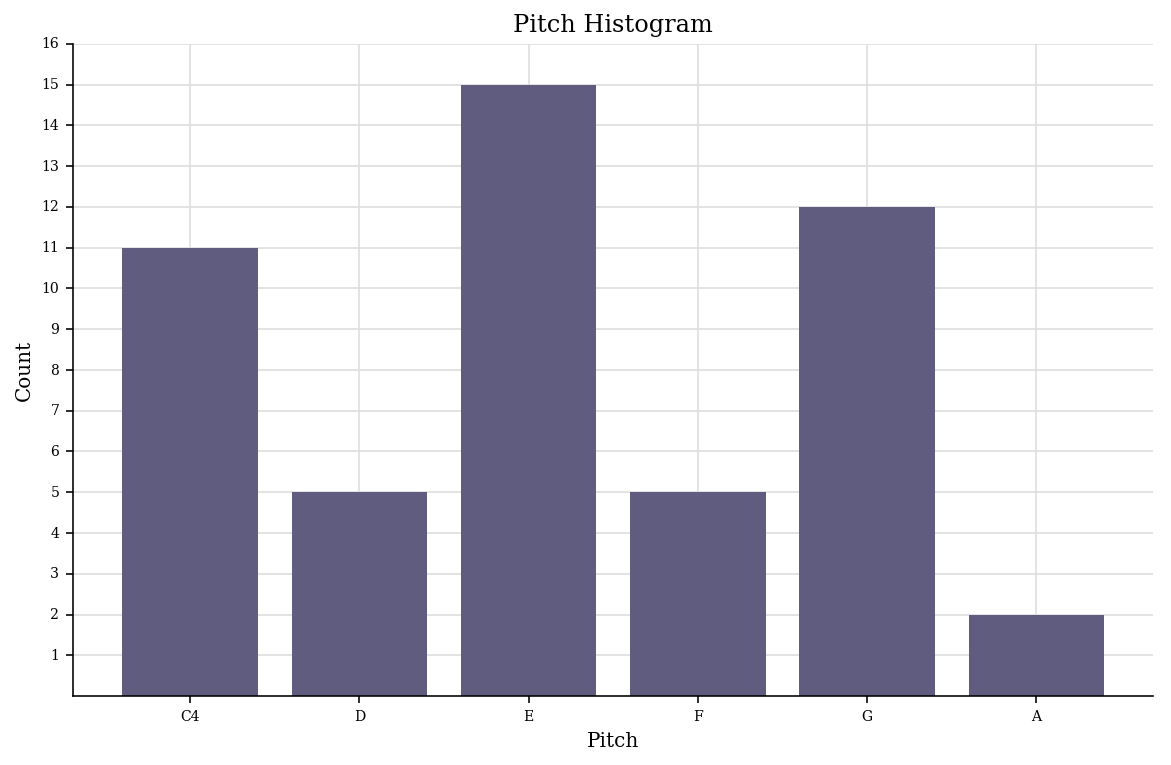

In [88]:
vocal1.measures(1,8).plot("histogram","pitch")
vocal1.measures(9,15).plot("histogram","pitch")
vocal1.measures(16,24).plot("histogram","pitch")

In [52]:
#調推定
print(analysis.discrete.analyzeStream(vocal1, 'Krumhansl'))
print(analysis.discrete.analyzeStream(vocal2, 'Krumhansl'))
print(analysis.discrete.analyzeStream(vocal3, 'Krumhansl'))
print(analysis.discrete.analyzeStream(vocal4, 'Krumhansl'))
print(analysis.discrete.analyzeStream(vocal5, 'Krumhansl'))
print(analysis.discrete.analyzeStream(vocal6, 'Krumhansl'))


C major
D major
B major
e minor
F# major
D major


C:\Users\match\Anaconda3\lib\site-packages\matplotlib\transforms.py:443: RuntimeWarning: invalid value encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)


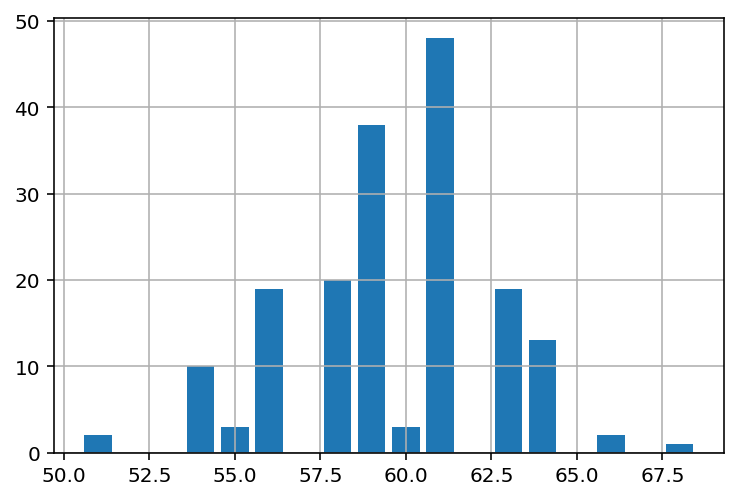

In [428]:
#音高の集計を可視化
left = guren_pitch_status.keys()
height = guren_pitch_status.values()
plt.bar(left,height)
plt.grid()

C:\Users\match\Anaconda3\lib\site-packages\matplotlib\transforms.py:443: RuntimeWarning: invalid value encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)


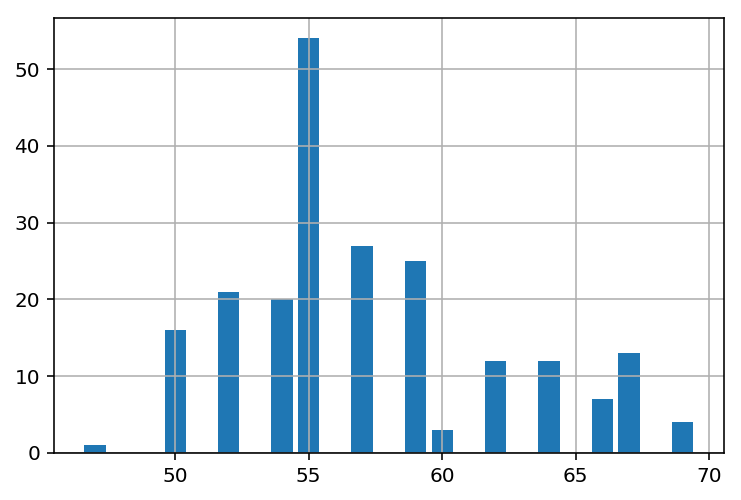

In [433]:
#音高の集計を可視化
left = konayuki_pitch_status.keys().map()
height = konayuki_pitch_status.values()
plt.bar(left,height)
plt.grid()

<BarContainer object of 10 artists>

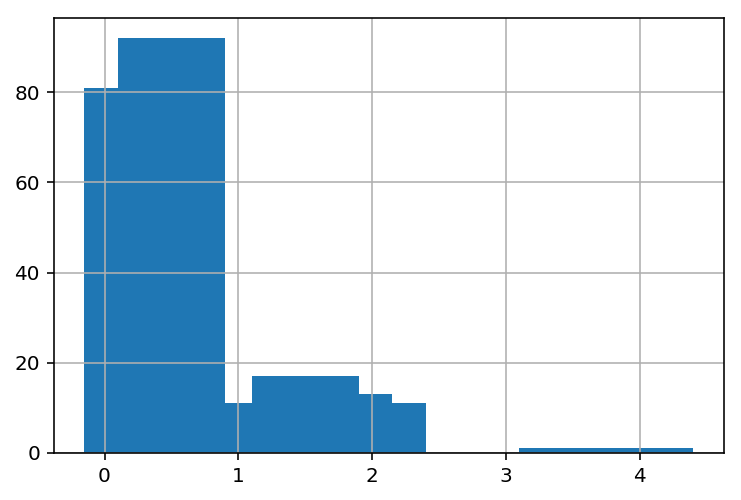

In [74]:
#音高Bigramの集計を可視化
def plot_duration(dur_count,title):
    left = str(dur_count.keys())
    height = dur_count.values()
    plt.title("{0} duration(quarter Length).".format(title))
    plt.grid()
    plt.bar(left,height)

In [22]:
#TSUNAMIの跳躍
jump_rate(konayuki_pitch_bigram_status)

NameError: name 'jump_rate' is not defined

In [41]:
abc = {3:0,45:6,0:5,np.inf:12}
c = 0
for i in abc.keys():
    if i == np.inf:
        print("hoge")
    else:
        c+=abc[i]
        
print(c)

hoge
11


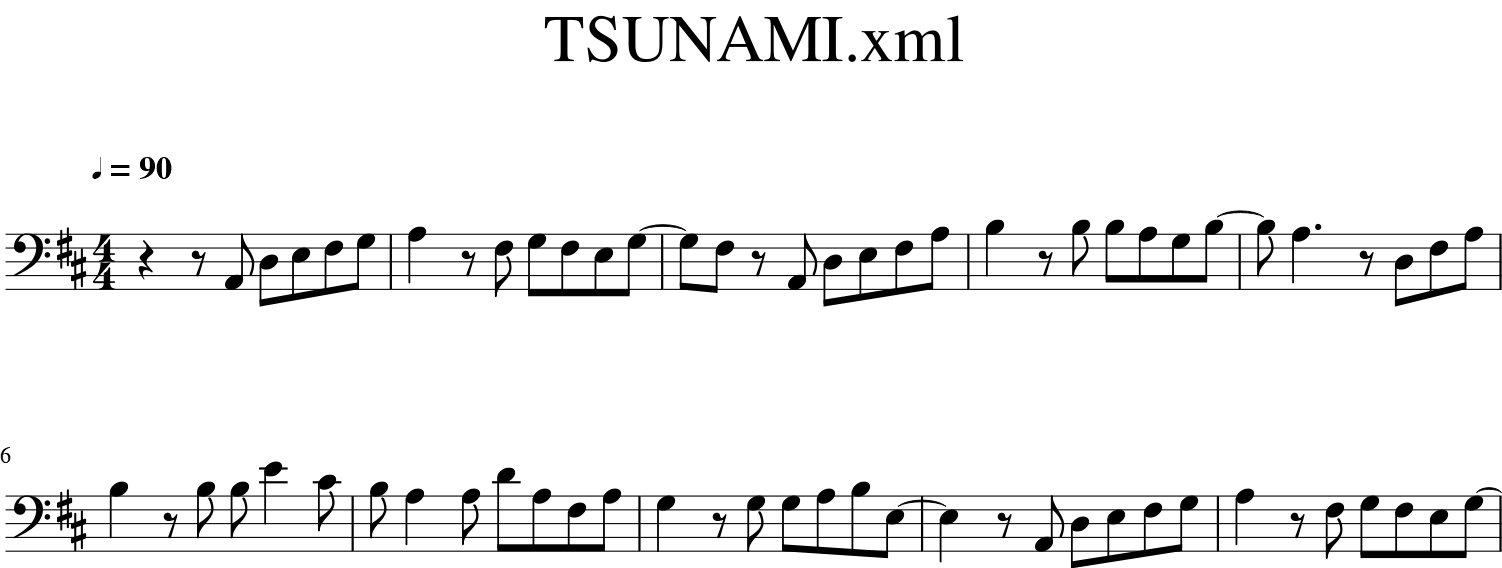

In [44]:
vocal2.show()
